# Task 2

#### perform data cleaning and exploratory data analysis(EDA) on a dataset of your choice , such as titanic dataset from kaggle. Explore the relationships between variable and identity pattern and trends in a data

## Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")

## View first 5 Rows

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data overview

In [5]:
train.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Check Missing values

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Handle missing values

In [10]:
# Fill missing Age values with median
train['Age'] = train['Age'].fillna(train['Age'].median())

# Fill missing Embarked values with mode
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Drop Cabin column safely
train = train.drop(columns=['Cabin'], errors='ignore')


## Verify Cleaning

In [11]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Checking duplicate records in dataset

In [12]:
train.duplicated().sum()

np.int64(0)

## Survival count of passenger

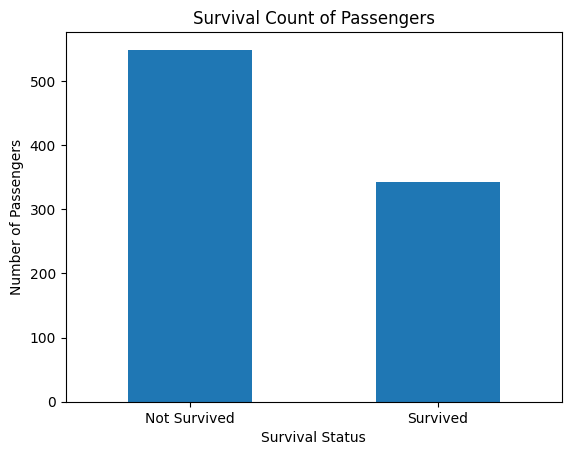

In [22]:
train['Survived'].value_counts().rename(
    {0: 'Not Survived', 1: 'Survived'}
).plot(kind='bar')

plt.xlabel("Survival Status")
plt.ylabel("Number of Passengers")
plt.title("Survival Count of Passengers")

plt.xticks(rotation=0)

plt.show()

## Survival Rate by Gender

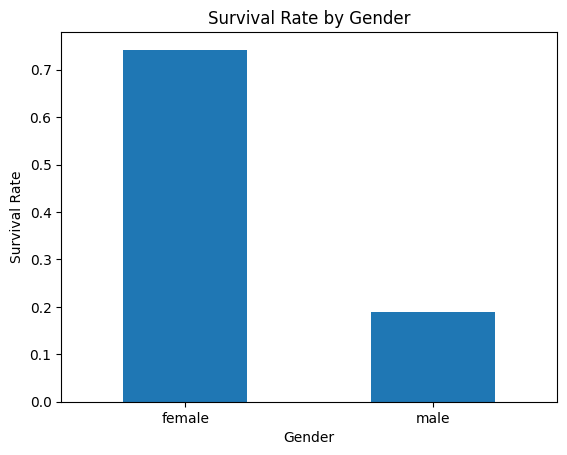

In [23]:
train.groupby('Sex')['Survived'].mean().plot(kind='bar')

plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Gender")
plt.xticks(rotation=0)
plt.show()

## Survival Rate by Passenger Class

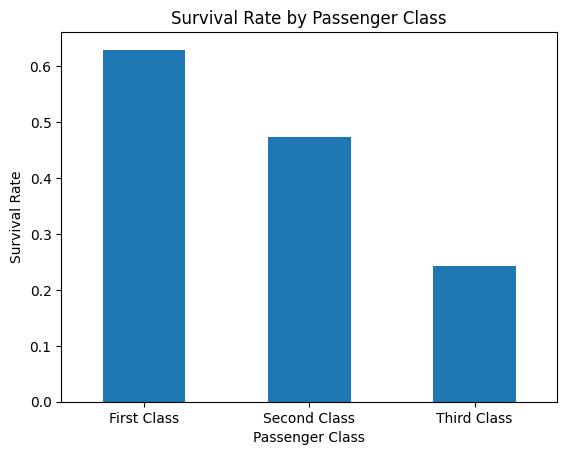

In [24]:
class_labels = {
    1: 'First Class',
    2: 'Second Class',
    3: 'Third Class'
}

train.groupby('Pclass')['Survived'].mean().rename(class_labels).plot(kind='bar')

plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Passenger Class")
plt.xticks(rotation=0)
plt.show()

## Age Distribution of Passenger

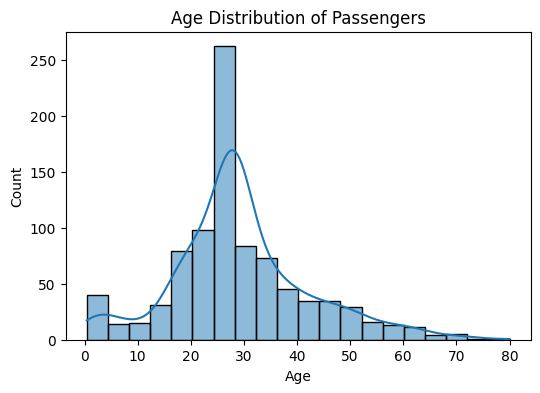

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(train['Age'], bins=20, kde=True)

plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Passengers")
plt.show()

## Age group Distribution

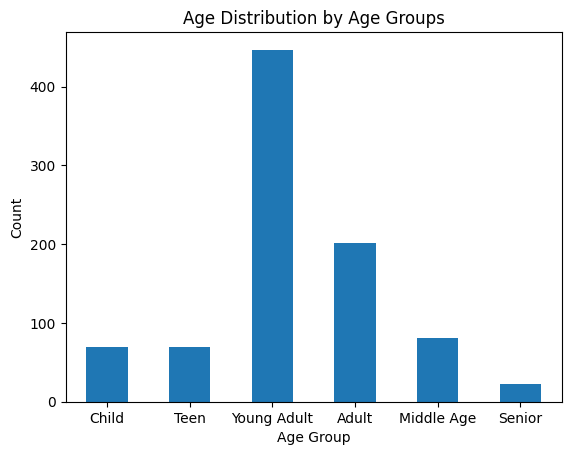

In [28]:
train['AgeGroup'] = pd.cut(
    train['Age'],
    bins=[0,12,18,30,45,60,80],
    labels=['Child','Teen','Young Adult','Adult','Middle Age','Senior']
)

train['AgeGroup'].value_counts().sort_index().plot(kind='bar')

plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Age Distribution by Age Groups")
plt.xticks(rotation=0)
plt.show()

## Fare distribution by survival

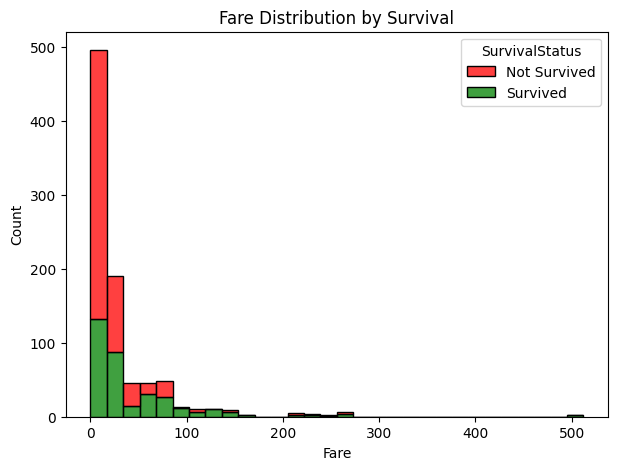

In [43]:
train['SurvivalStatus'] = train['Survived'].map({0: 'Not Survived', 1: 'Survived'})

plt.figure(figsize=(7,5))
sns.histplot(
    data=train,
    x='Fare',
    hue='SurvivalStatus',   
    multiple='stack',
    palette={'Not Survived':'red', 'Survived':'green'},
    bins=30
)

plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Fare Distribution by Survival")
plt.show()